***DATA EXPLORATION***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import yfinance as yf

stock = 'RELIANCE.NS'
start = '2015-01-01'
end = '2025-01-01'

df = yf.download(stock, start, end)
df.columns = df.columns.get_level_values(0)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,194.854065,195.753834,193.921379,194.502947,2963643
2015-01-02,194.338364,196.642649,194.064053,194.897973,7331366
2015-01-05,192.209625,195.512431,191.825575,194.217639,10103941
2015-01-06,183.486328,191.584221,182.586559,190.925860,18627980
2015-01-07,187.480408,188.467956,183.683842,183.705787,20720312


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2467 entries, 2015-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2467 non-null   float64
 1   High    2467 non-null   float64
 2   Low     2467 non-null   float64
 3   Open    2467 non-null   float64
 4   Volume  2467 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.6 KB


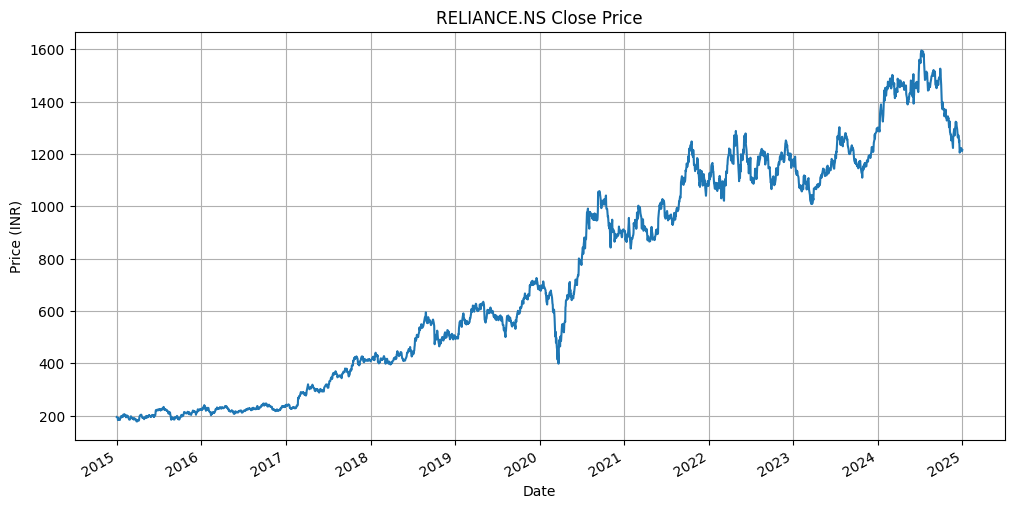

In [10]:
df['Close'].plot(figsize=(12,6), title = f'{stock} Close Price', xlabel = 'Date', ylabel = 'Price (INR)' )
plt.grid(True)
plt.show()

**STEP 1: Checking for Missing Values**

In [13]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values in each column:\n", missing)


Missing values in each column:
 Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


**STEP 2 : Descriptive Statistics**

In [14]:
# Basic statistical overview
summary = df.describe()
print("Summary statistics:\n", summary)


Summary statistics:
 Price        Close         High          Low         Open        Volume
count  2467.000000  2467.000000  2467.000000  2467.000000  2.467000e+03
mean    735.681749   743.726992   728.277462   736.210922  1.842886e+07
std     419.871160   423.771060   416.299884   420.174412  1.355224e+07
min     177.923126   179.448339   174.784921   179.206945  1.705656e+06
25%     320.113373   322.096681   317.585629   320.324464  1.069616e+07
50%     647.228577   658.254694   641.726779   650.610767  1.464381e+07
75%    1125.844360  1138.157074  1116.490012  1127.283374  2.109197e+07
max    1595.484985  1603.358288  1580.137072  1599.022925  1.426834e+08


**STEP 3 : Moving Averages (Trend Smoothing)**

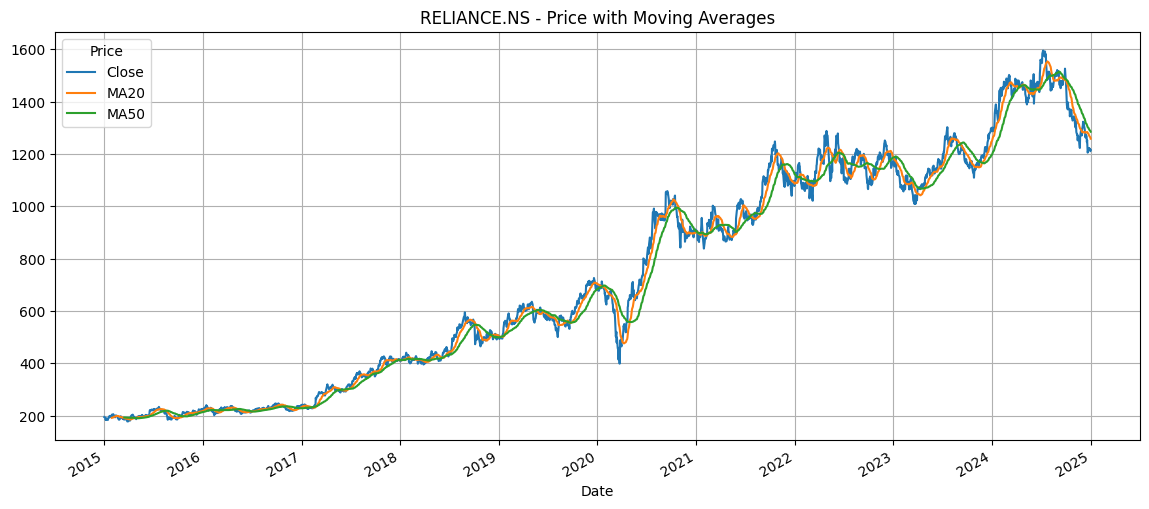

In [15]:
# Add 20-day and 50-day moving averages to the DataFrame
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Plot Close price with moving averages
df[['Close', 'MA20', 'MA50']].plot(figsize=(14, 6), title=f"{stock} - Price with Moving Averages")
plt.grid(True)
plt.show()


**STEP 4 : Daily Returns**

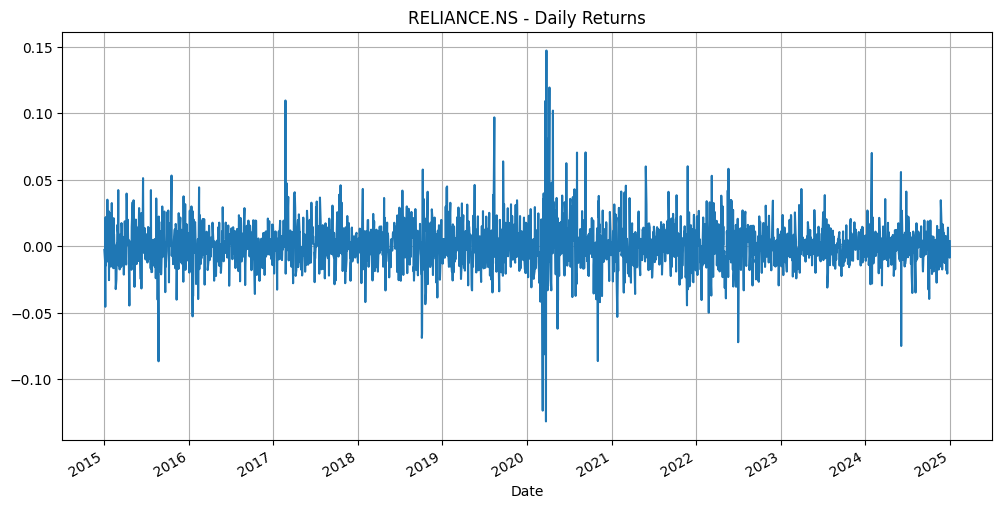

In [16]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Plot daily returns
df['Daily Return'].plot(figsize=(12, 6), title=f"{stock} - Daily Returns")
plt.grid(True)
plt.show()


**STEP 5 : Rolling Volatility**

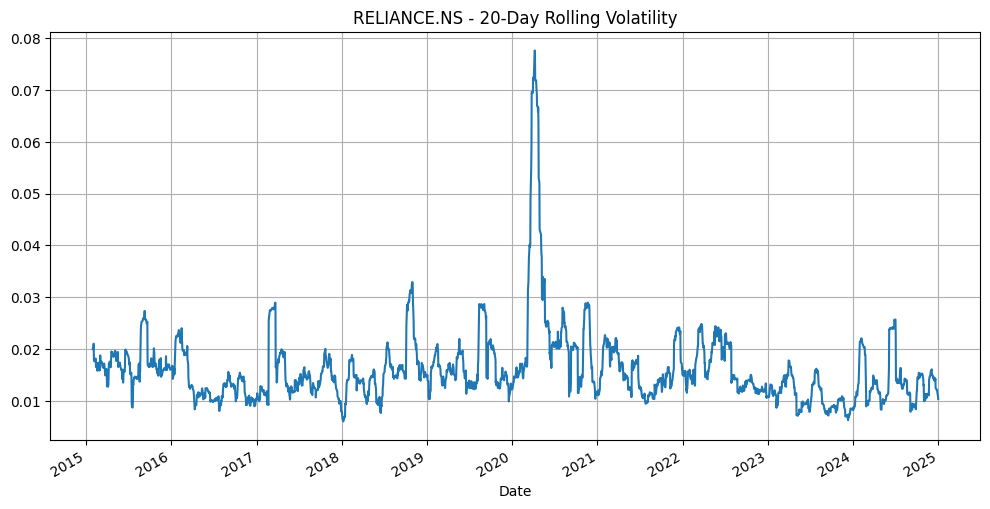

In [18]:
# Rolling 20-day standard deviation (volatility)
#Helps you measure risk : High Volatility = Risky Asset
df['Rolling Volatility'] = df['Daily Return'].rolling(window=20).std()

# Plot rolling volatility
df['Rolling Volatility'].plot(figsize=(12, 6), title=f"{stock} - 20-Day Rolling Volatility")
plt.grid(True)
plt.show()
